## Quiz 3 
## Brandan Owens and Loan Pham

### Q.1 Read in the dataframe “gss_cat.csv”.

In [15]:
#import dataset and tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("../dataFiles/gss_cat.csv")
df.rename(columns={'Unnamed: 0':'numbers'}, inplace=True)
df.head()

,numbers,year,marital,age,race,rincome,partyid,relig,denom,tvhours
0,1,2000,Never married,26.0,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12.0
1,2,2000,Divorced,48.0,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NaN
2,3,2000,Widowed,67.0,White,Not applicable,Independent,Protestant,No denomination,2.0
3,4,2000,Never married,39.0,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4.0
4,5,2000,Divorced,25.0,White,Not applicable,Not str democrat,None,Not applicable,1.0


<AxesSubplot:>

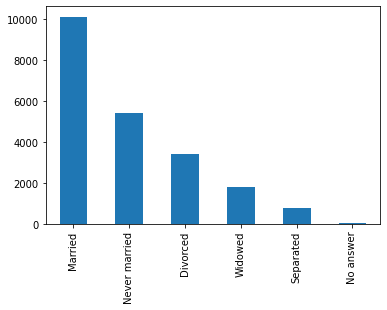

In [17]:
# (a) create a bar plot for “marital”. It should look like this:

df['marital'].value_counts().plot.bar()

<Figure size 720x360 with 0 Axes>

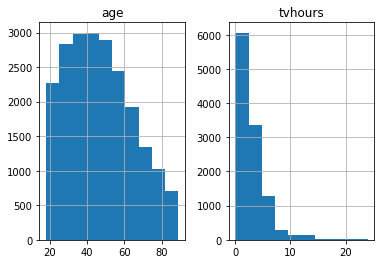

In [18]:
# (b) Create a histogram for “age” on the left, then a histogram for “tvhours” on the right. Set the figsize = (10,5)

plt.figure(figsize=(10,5))
df.hist(column=["age", "tvhours"])
plt.show()


In [19]:
# (c) You will create a line plot to see how the proportions of people identified as Democrat, Republican, and Independent 
# change over time. 
# (i) First, recode the variable “partyid”
df.replace({'No answer': 'other', 
            'Don\'t know': 'other', 
            'Other party': 'other',
            'Strong republican': 'rep',
            'Not str republican': 'rep',
            'Ind,near rep': 'ind',
            'Independent': 'ind',
            'Ind,near dem': 'ind',
            'Not str democrat': 'dem',
            'Strong democrat': 'dem'},
          inplace = True)
df.head()


,numbers,year,marital,age,race,rincome,partyid,relig,denom,tvhours
0,1,2000,Never married,26.0,White,$8000 to 9999,ind,Protestant,Southern baptist,12.0
1,2,2000,Divorced,48.0,White,$8000 to 9999,rep,Protestant,Baptist-dk which,NaN
2,3,2000,Widowed,67.0,White,Not applicable,ind,Protestant,No denomination,2.0
3,4,2000,Never married,39.0,White,Not applicable,ind,Orthodox-christian,Not applicable,4.0
4,5,2000,Divorced,25.0,White,Not applicable,dem,None,Not applicable,1.0


In [20]:
# (ii) then, create a table which shows the proportions of people identified 
# as Democrat, Republican, Independent and Other for each year.

party = df.groupby(['year','partyid'])['partyid'].count().unstack()
party['sum'] = party.sum(axis = 1)
party['dem'] = party['dem'] / party['sum']
party['ind'] = party['ind'] / party['sum']
party['other'] = party['other'] / party['sum']
party['rep'] = party['rep'] / party['sum']
party.drop(['sum'], axis=1, inplace = True)
          

<AxesSubplot:xlabel='year'>

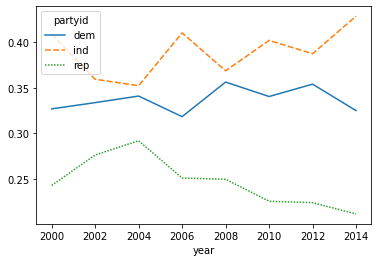

In [21]:
# (iii) Create a line plot to see how the proportions of people identified
# as Democrat, Republican, and Independent changed over time.
party.drop(['other'], axis=1, inplace=True)
sns.lineplot(data=party) 